In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
col = ['Airline_Name','Date_of_Journey','Source','Destination','Dept_Time','Total_Stops','Duration_of_Flight','Arr_Time','Fare']

Assigning columns names for the dataframe

In [3]:
flight = pd.read_csv('airlines_dataset.csv', names = col, header = None, sep = '	')

In [4]:
flight

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 stop,07h 05m,20:35,"3,379.00"
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 stop,13h 10m,22:15,"3,379.00"
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 stop,08h 20m,0:35,"3,379.00"
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 stop,06h 55m,6:35,"3,379.00"
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 stop,10h 35m,6:35,"3,379.00"
...,...,...,...,...,...,...,...,...,...
2016,Vistara,10/7/2022,Mumbai,Chennai,6:20,2 Stop,13h 55m,20:15,"15,192.00"
2017,Vistara,10/7/2022,Mumbai,Chennai,11:25,2 Stop,11h 20m,22:45,"16,442.00"
2018,Vistara,10/7/2022,Mumbai,Chennai,6:45,2 Stop,13h 30m,20:15,"16,442.00"
2019,Vistara,10/7/2022,Mumbai,Chennai,9:05,2 Stop,11h 10m,20:15,"17,282.00"


In [5]:
flight["Fare"] = [float(str(i).replace(",", "")) for i in flight["Fare"]]

Replaced the datadtype of fare from object to float

In [6]:
data = flight.copy()

In [7]:
print("Dataset Shape is:",data.shape)
print("Numbers of rows in our dataset are:",data.shape[0])
print("Numbers of columns in our dataset are:",data.shape[1])

Dataset Shape is: (2021, 9)
Numbers of rows in our dataset are: 2021
Numbers of columns in our dataset are: 9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline_Name        2021 non-null   object 
 1   Date_of_Journey     2021 non-null   object 
 2   Source              2021 non-null   object 
 3   Destination         2021 non-null   object 
 4   Dept_Time           2021 non-null   object 
 5   Total_Stops         2021 non-null   object 
 6   Duration_of_Flight  2021 non-null   object 
 7   Arr_Time            2021 non-null   object 
 8   Fare                2021 non-null   float64
dtypes: float64(1), object(8)
memory usage: 142.2+ KB


In [9]:
data.describe(include='all')

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare
count,2021,2021,2021,2021,2021,2021,2021,2021,2021.000000
unique,8,18,11,12,231,10,384,248,NaN
top,IndiGo,10/4/2022,New Delhi,Mumbai,19:00,1 Stop,2h 10m,22:45,NaN
freq,698,237,510,548,34,1000,57,24,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4511.821870
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2073.431268
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4147.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5335.000000


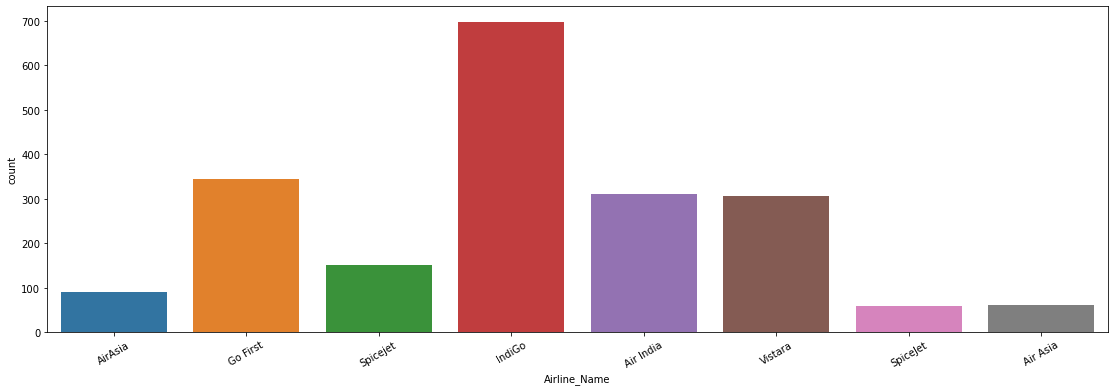

In [10]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Airline_Name'])
plt.show()

Above is the list of airlines in graphical form. We can see that we have maximum flights of indigo which means they are doing good :)

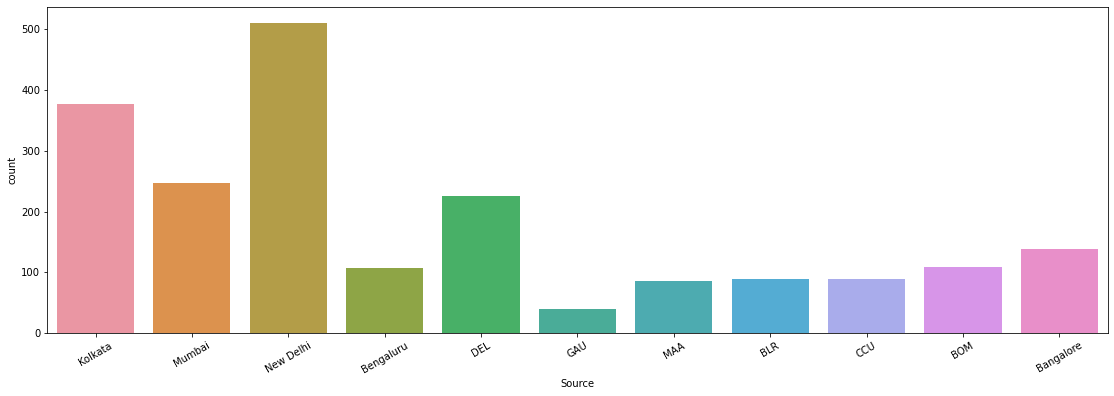

In [11]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Source'])
plt.show()

From the above countplot we can say that we have maximum number of passengers from delhi. Also, we can see that we have several anonyms for some of the airports, let's change them 

In [12]:
data["Source"].value_counts()

New Delhi    510
Kolkata      377
Mumbai       247
DEL          226
Bangalore    138
BOM          109
Bengaluru    108
CCU           90
BLR           90
MAA           86
GAU           40
Name: Source, dtype: int64

In [13]:
def change_value(X,Y):
    number = []
    for key,values in data["Source"].iteritems():
        if(values) == X:
            number.append(key)
            
    for i in number:
        if data["Source"][i] == X:
            data["Source"][i] = Y

In [26]:
change_value('BOM','Mumbai')

In [27]:
data["Source"].value_counts()

New Delhi    736
Kolkata      467
Mumbai       356
Bengaluru    336
Chennai       86
Guwahati      40
Name: Source, dtype: int64

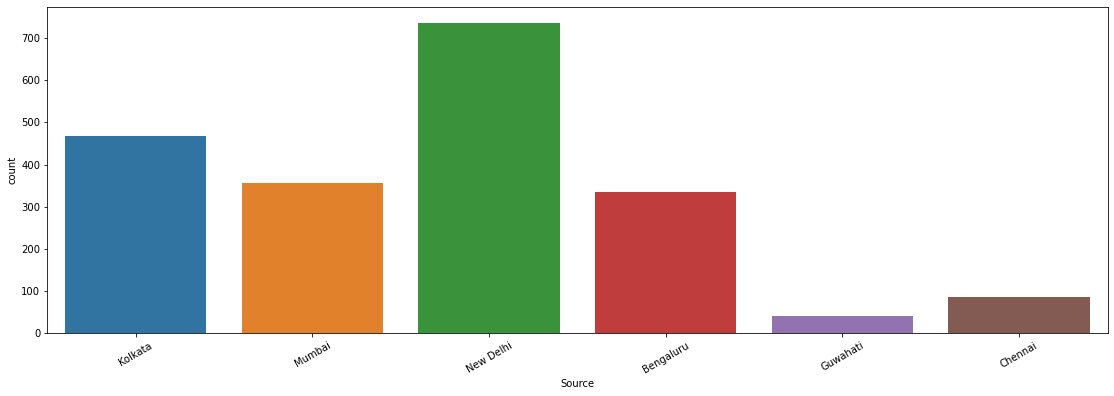

In [28]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Source'])
plt.show()

Much better, now we have all the airports by name of the cities or airports which are in our dataset still New Delhi tops. Rich people :)

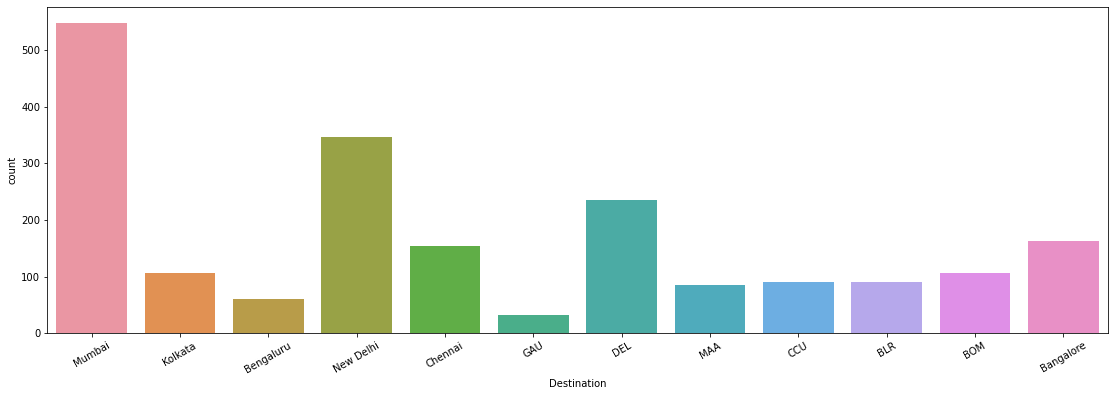

In [29]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Destination'])
plt.show()

As we can check we have to do the same for destination as well. 

In [30]:
data["Destination"].value_counts()

Mumbai       548
New Delhi    347
DEL          235
Bangalore    163
Chennai      154
Kolkata      107
BOM          107
CCU           90
BLR           90
MAA           86
Bengaluru     61
GAU           33
Name: Destination, dtype: int64

In [31]:
def change_value_dest(X,Y):
    number = []
    for key,values in data["Destination"].iteritems():
        if(values) == X:
            number.append(key)
            
    for i in number:
        if data["Destination"][i] == X:
            data["Destination"][i] = Y

In [44]:
change_value_dest('GAU','Guwahati')

In [45]:
data["Destination"].value_counts()

Mumbai       655
New Delhi    582
Bengaluru    314
Chennai      240
Kolkata      197
Guwahati      33
Name: Destination, dtype: int64

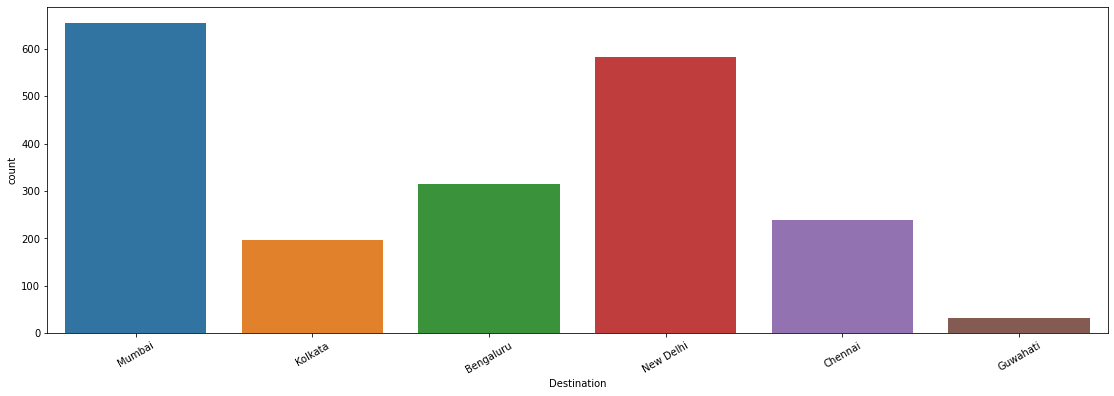

In [46]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Destination'])
plt.show()

New graph after changing the values, we can see that most of bookings as per pur dataset are towards mumbai and delhi

In [47]:
data.columns

Index(['Airline_Name', 'Date_of_Journey', 'Source', 'Destination', 'Dept_Time',
       'Total_Stops', 'Duration_of_Flight', 'Arr_Time', 'Fare'],
      dtype='object')

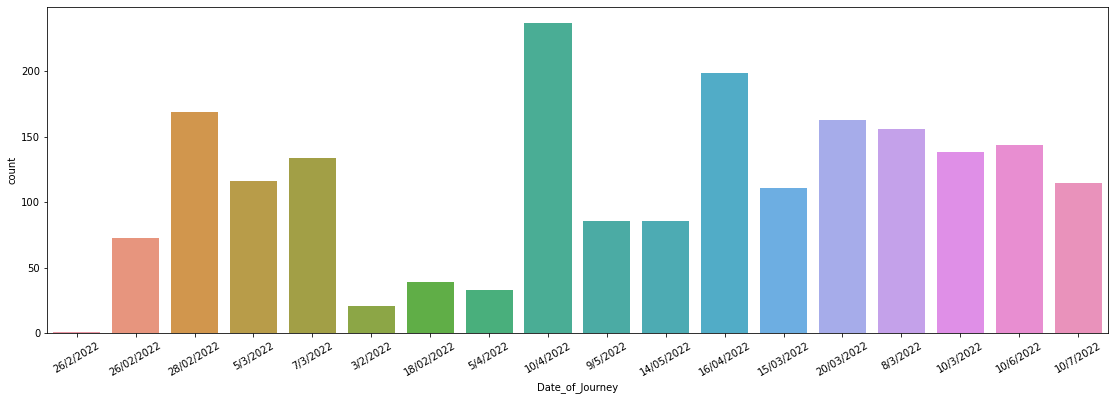

In [48]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(data['Date_of_Journey'])
plt.show()

We can see that 10th April is having highest booking

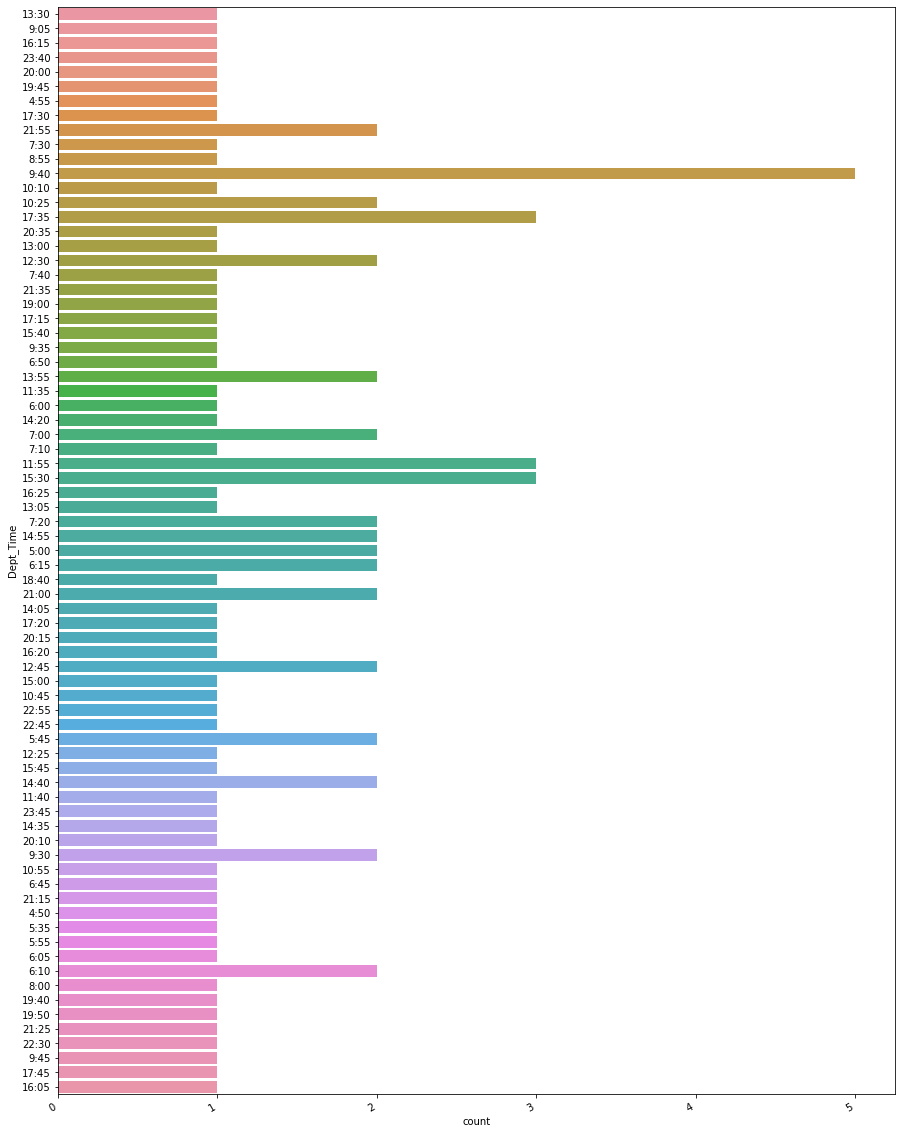

In [49]:
plt.figure(figsize=(15,20))
plt.xticks(rotation=30,ha="right")
sns.countplot(y = data['Dept_Time'].head(100))
plt.show()

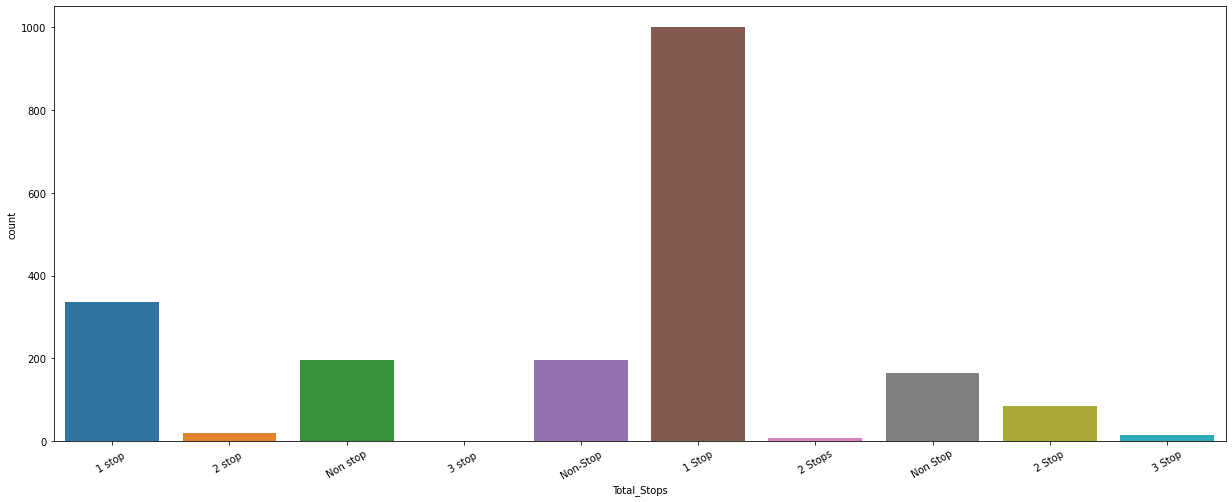

In [50]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.countplot(data['Total_Stops'])
plt.show()

In [51]:
data["Total_Stops"].value_counts()

1 Stop      1000
1 stop       337
Non-Stop     197
Non stop     196
Non Stop     164
2 Stop        86
2 stop        19
3 Stop        14
2 Stops        7
3 stop         1
Name: Total_Stops, dtype: int64

In [52]:
def change_value_stop(X,Y):
    number = []
    for key,values in data["Total_Stops"].iteritems():
        if(values) == X:
            number.append(key)
            
    for i in number:
        if data["Total_Stops"][i] == X:
            data["Total_Stops"][i] = Y

In [53]:
data["Total_Stops"][569]

'1 Stop'

In [54]:
data["Total_Stops"][1]

'2 stop '

In [66]:
change_value_stop('3 stop ','3 Stop')

In [69]:
data["Total_Stops"].value_counts()

1 Stop      1337
Non-Stop     197
Non stop     196
Non Stop     164
2 Stop       112
3 Stop        15
Name: Total_Stops, dtype: int64

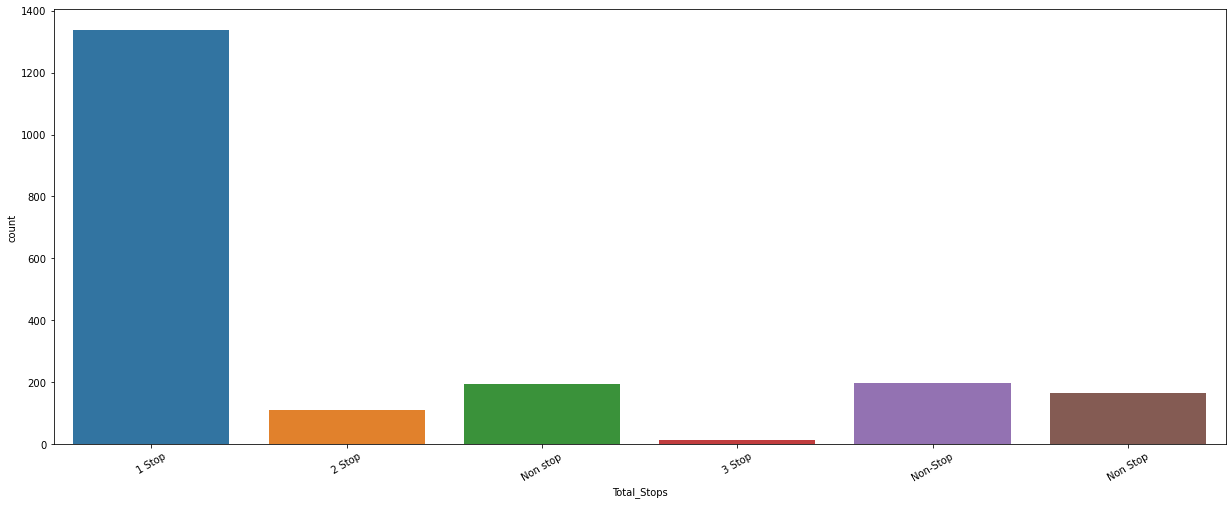

In [70]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.countplot(data['Total_Stops'])
plt.show()

In [71]:
data.columns

Index(['Airline_Name', 'Date_of_Journey', 'Source', 'Destination', 'Dept_Time',
       'Total_Stops', 'Duration_of_Flight', 'Arr_Time', 'Fare'],
      dtype='object')

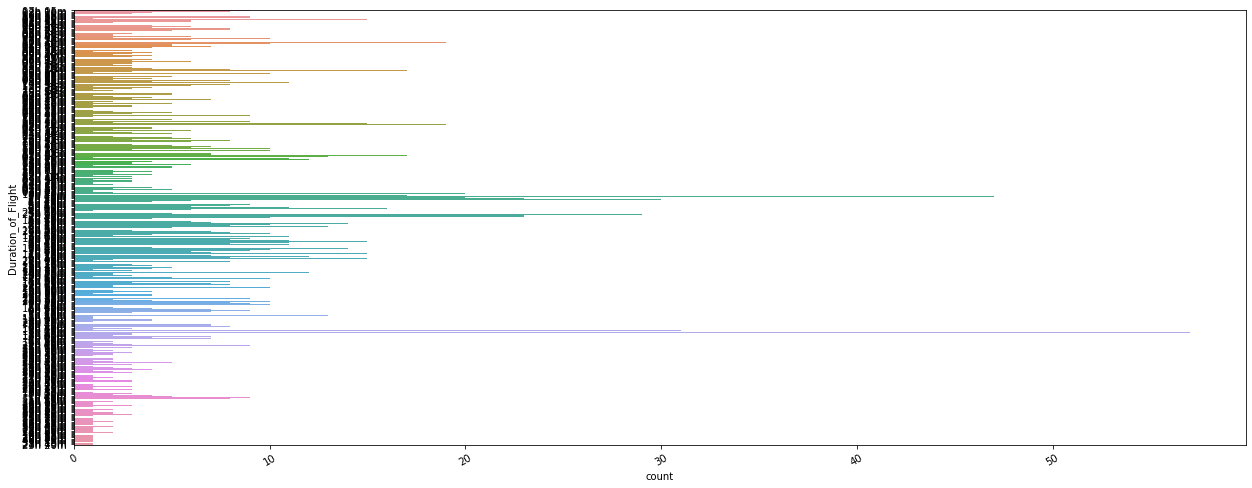

In [72]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.countplot(y = data['Duration_of_Flight'])
plt.show()

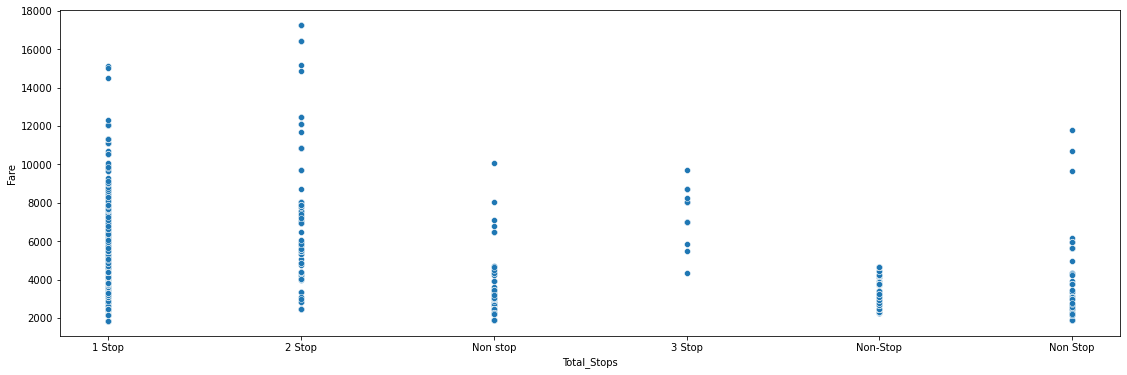

In [73]:
plt.figure(figsize=(19,6))
sns.scatterplot(x = 'Total_Stops' , y = 'Fare' , data = data)
plt.show()

Flights having 2-stop is having higher price as compare to other fligts

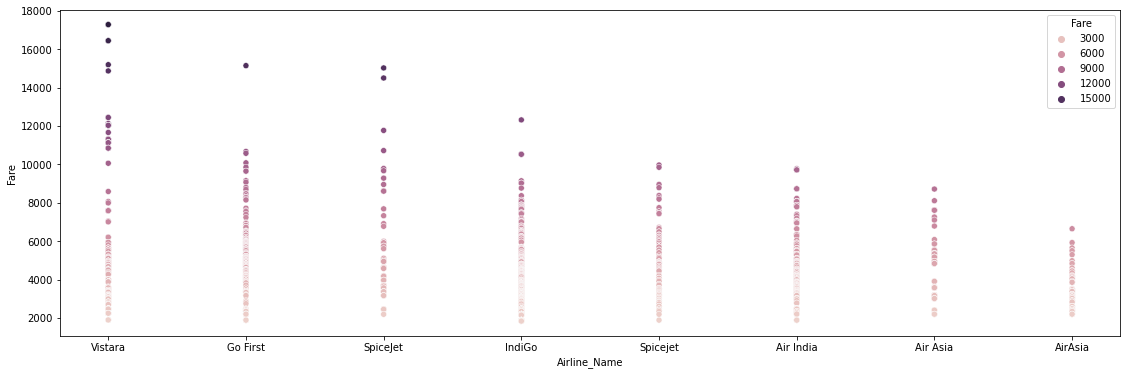

In [74]:
plt.figure(figsize=(19,6))
sns.scatterplot(x = 'Airline_Name' , y = 'Fare' , data = data.sort_values('Fare',ascending=False),hue ='Fare')
plt.show()

As per to this graph we can check and observe that vistara is one of the costliest flights in our dataset. 

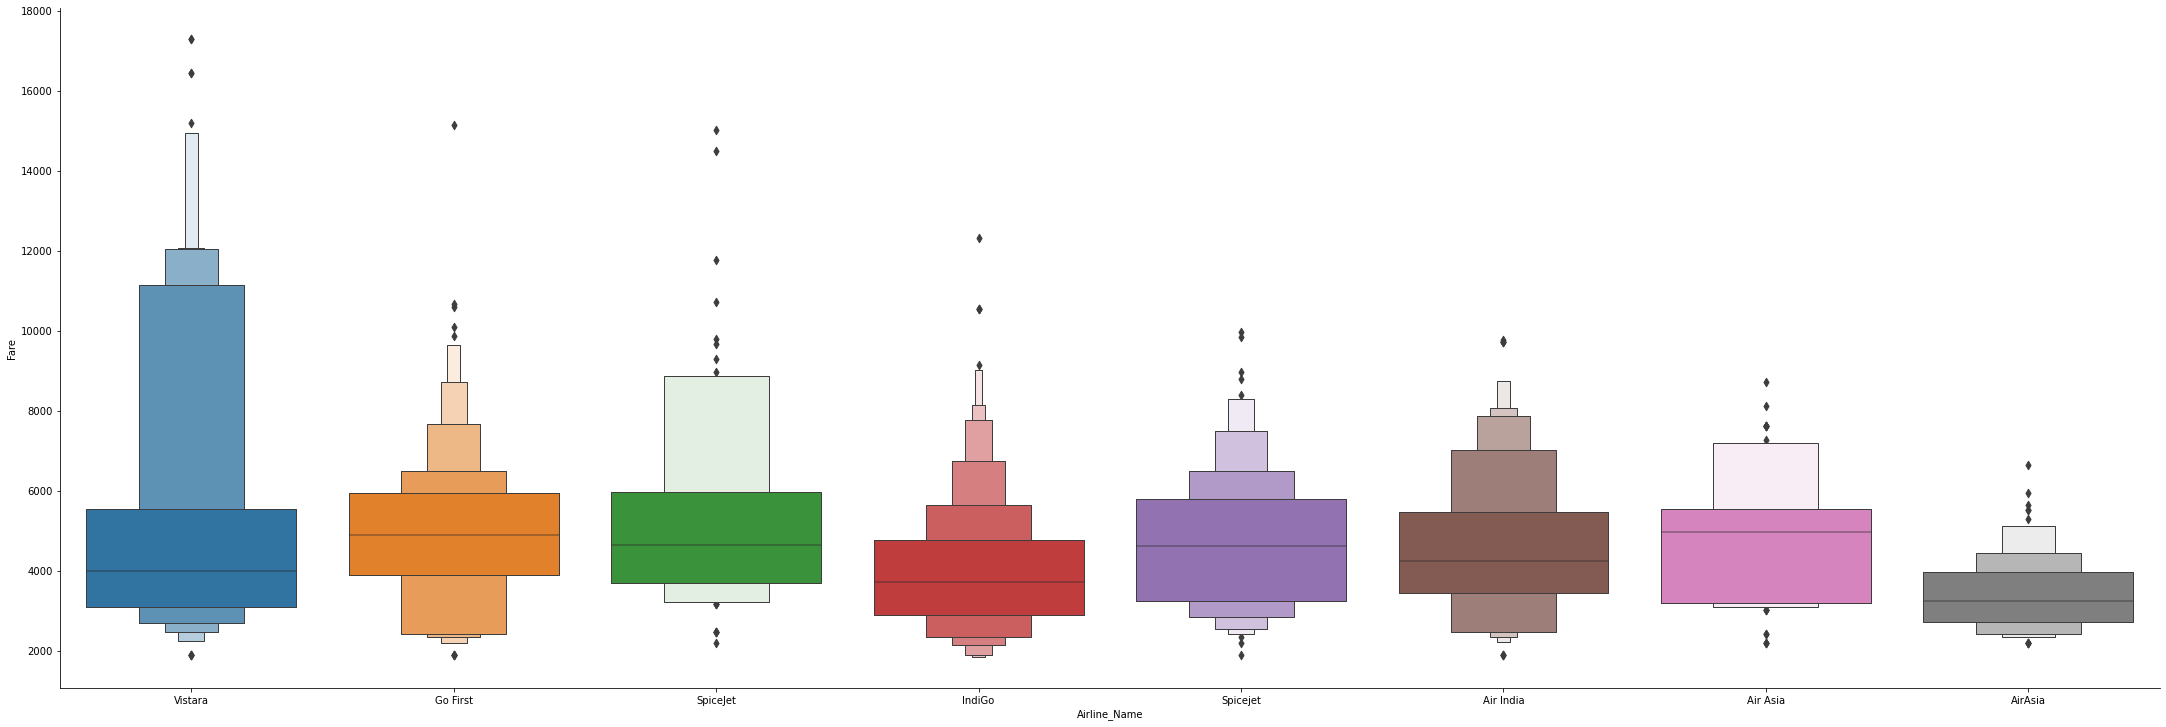

In [75]:
sns.catplot(y='Fare',x='Airline_Name', data = data.sort_values('Fare',ascending=False),kind='boxen',height=10,aspect=3)
plt.show()

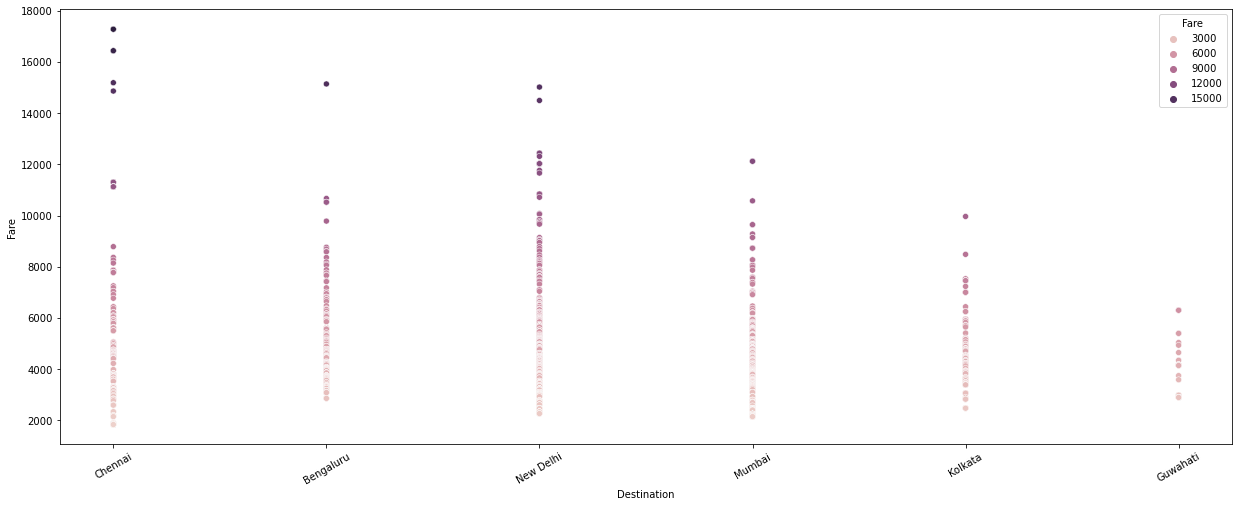

In [76]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Destination' , y = 'Fare' , data = data.sort_values('Fare',ascending=False),hue ='Fare')
plt.show()

We can say that tickets to chennai are costliest

In [77]:
data.isnull().sum()

Airline_Name          0
Date_of_Journey       0
Source                0
Destination           0
Dept_Time             0
Total_Stops           0
Duration_of_Flight    0
Arr_Time              0
Fare                  0
dtype: int64

No null values in the dataset

Fare    AxesSubplot(0.125,0.71587;0.065678x0.16413)
dtype: object

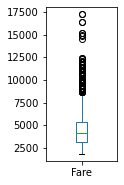

In [78]:
data.plot(kind='box', subplots=True, layout=(4,10), figsize = (15,13))

In [79]:
data

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 Stop,07h 05m,20:35,3379.0
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 Stop,13h 10m,22:15,3379.0
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 Stop,08h 20m,0:35,3379.0
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 Stop,06h 55m,6:35,3379.0
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 Stop,10h 35m,6:35,3379.0
...,...,...,...,...,...,...,...,...,...
2016,Vistara,10/7/2022,Mumbai,Chennai,6:20,2 Stop,13h 55m,20:15,15192.0
2017,Vistara,10/7/2022,Mumbai,Chennai,11:25,2 Stop,11h 20m,22:45,16442.0
2018,Vistara,10/7/2022,Mumbai,Chennai,6:45,2 Stop,13h 30m,20:15,16442.0
2019,Vistara,10/7/2022,Mumbai,Chennai,9:05,2 Stop,11h 10m,20:15,17282.0


In [80]:
data['Day_of_journey'] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.day
data['Month_of_journey'] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [81]:
data

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare,Day_of_journey,Month_of_journey
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 Stop,07h 05m,20:35,3379.0,26,2
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 Stop,13h 10m,22:15,3379.0,26,2
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 Stop,08h 20m,0:35,3379.0,26,2
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 Stop,06h 55m,6:35,3379.0,26,2
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 Stop,10h 35m,6:35,3379.0,26,2
...,...,...,...,...,...,...,...,...,...,...,...
2016,Vistara,10/7/2022,Mumbai,Chennai,6:20,2 Stop,13h 55m,20:15,15192.0,10,7
2017,Vistara,10/7/2022,Mumbai,Chennai,11:25,2 Stop,11h 20m,22:45,16442.0,10,7
2018,Vistara,10/7/2022,Mumbai,Chennai,6:45,2 Stop,13h 30m,20:15,16442.0,10,7
2019,Vistara,10/7/2022,Mumbai,Chennai,9:05,2 Stop,11h 10m,20:15,17282.0,10,7


In [82]:
data['Dept_time_hour'] = pd.to_datetime(data["Dept_Time"]).dt.hour
data['Dept_time_min'] = pd.to_datetime(data["Dept_Time"]).dt.minute

In [83]:
data

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 Stop,07h 05m,20:35,3379.0,26,2,13,30
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 Stop,13h 10m,22:15,3379.0,26,2,9,5
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 Stop,08h 20m,0:35,3379.0,26,2,16,15
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 Stop,06h 55m,6:35,3379.0,26,2,23,40
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 Stop,10h 35m,6:35,3379.0,26,2,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Vistara,10/7/2022,Mumbai,Chennai,6:20,2 Stop,13h 55m,20:15,15192.0,10,7,6,20
2017,Vistara,10/7/2022,Mumbai,Chennai,11:25,2 Stop,11h 20m,22:45,16442.0,10,7,11,25
2018,Vistara,10/7/2022,Mumbai,Chennai,6:45,2 Stop,13h 30m,20:15,16442.0,10,7,6,45
2019,Vistara,10/7/2022,Mumbai,Chennai,9:05,2 Stop,11h 10m,20:15,17282.0,10,7,9,5


In [84]:
data['Arr_Time_hour'] = pd.to_datetime(data["Arr_Time"]).dt.hour
data['Arr_Time_min'] = pd.to_datetime(data["Arr_Time"]).dt.minute

In [85]:
data.head()

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 Stop,07h 05m,20:35,3379.0,26,2,13,30,20,35
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 Stop,13h 10m,22:15,3379.0,26,2,9,5,22,15
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 Stop,08h 20m,0:35,3379.0,26,2,16,15,0,35
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 Stop,06h 55m,6:35,3379.0,26,2,23,40,6,35
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 Stop,10h 35m,6:35,3379.0,26,2,20,0,6,35


In [88]:
duration = list(data["Duration_of_Flight"])

In [89]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] =  "0h " + duration[i]

We have moved the column into a list named Duration inorder to split the data. As the columns contains the data in form of string. So, we ran a loop to length of duration and in if we added a condition if the splitted length not equal to 2 means carrying only 1 attribute minutes will added else hours will be added. 

In [90]:
duration_hours = []
duration_min= []

In [91]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [93]:
data["Duration Hours"] = duration_hours
data["Duration Minutes"] = duration_min

In [94]:
data.head()

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min,Duration Hours,Duration Minutes
0,AirAsia,26/2/2022,Kolkata,Mumbai,13:30,1 Stop,07h 05m,20:35,3379.0,26,2,13,30,20,35,7,5
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 Stop,13h 10m,22:15,3379.0,26,2,9,5,22,15,13,10
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 Stop,08h 20m,0:35,3379.0,26,2,16,15,0,35,8,20
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 Stop,06h 55m,6:35,3379.0,26,2,23,40,6,35,6,55
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 Stop,10h 35m,6:35,3379.0,26,2,20,0,6,35,10,35


In [95]:
data = data.drop('Date_of_Journey',axis=1)
data = data.drop('Dept_Time',axis=1)
data = data.drop('Arr_Time',axis=1)
data = data.drop('Duration_of_Flight',axis=1)

In [96]:
data

,Airline_Name,Source,Destination,Total_Stops,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min,Duration Hours,Duration Minutes
0,AirAsia,Kolkata,Mumbai,1 Stop,3379.0,26,2,13,30,20,35,7,5
1,AirAsia,Kolkata,Mumbai,2 Stop,3379.0,26,2,9,5,22,15,13,10
2,AirAsia,Kolkata,Mumbai,1 Stop,3379.0,26,2,16,15,0,35,8,20
3,AirAsia,Kolkata,Mumbai,1 Stop,3379.0,26,2,23,40,6,35,6,55
4,AirAsia,Kolkata,Mumbai,1 Stop,3379.0,26,2,20,0,6,35,10,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Vistara,Mumbai,Chennai,2 Stop,15192.0,10,7,6,20,20,15,13,55
2017,Vistara,Mumbai,Chennai,2 Stop,16442.0,10,7,11,25,22,45,11,20
2018,Vistara,Mumbai,Chennai,2 Stop,16442.0,10,7,6,45,20,15,13,30
2019,Vistara,Mumbai,Chennai,2 Stop,17282.0,10,7,9,5,20,15,11,10


In [97]:
airline = data["Airline_Name"]
airline = pd.get_dummies(airline,drop_first=True)
airline

,Air India,AirAsia,Go First,IndiGo,SpiceJet,Spicejet,Vistara
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2016,0,0,0,0,0,0,1
2017,0,0,0,0,0,0,1
2018,0,0,0,0,0,0,1
2019,0,0,0,0,0,0,1


We have used get dummies technique of one hot encoding to encode the Airlines column of our dataset. The data is nominal data so we used this technique here.

In [98]:
destination = data[["Destination"]]
destination = pd.get_dummies(destination,drop_first=True)
destination

,Destination_Chennai,Destination_Guwahati,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
2016,1,0,0,0,0
2017,1,0,0,0,0
2018,1,0,0,0,0
2019,1,0,0,0,0


In [99]:
source = data[["Source"]]
source = pd.get_dummies(source,drop_first=True)
source

,Source_Chennai,Source_Guwahati,Source_Kolkata,Source_Mumbai,Source_New Delhi
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
2016,0,0,0,1,0
2017,0,0,0,1,0
2018,0,0,0,1,0
2019,0,0,0,1,0


In [101]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Total_Stops'] = label.fit_transform(data['Total_Stops'])

Here we use label encoder techniqiue to encode the data as this columns has ordinal data. 

In [102]:
data

,Airline_Name,Source,Destination,Total_Stops,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min,Duration Hours,Duration Minutes
0,AirAsia,Kolkata,Mumbai,0,3379.0,26,2,13,30,20,35,7,5
1,AirAsia,Kolkata,Mumbai,1,3379.0,26,2,9,5,22,15,13,10
2,AirAsia,Kolkata,Mumbai,0,3379.0,26,2,16,15,0,35,8,20
3,AirAsia,Kolkata,Mumbai,0,3379.0,26,2,23,40,6,35,6,55
4,AirAsia,Kolkata,Mumbai,0,3379.0,26,2,20,0,6,35,10,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Vistara,Mumbai,Chennai,1,15192.0,10,7,6,20,20,15,13,55
2017,Vistara,Mumbai,Chennai,1,16442.0,10,7,11,25,22,45,11,20
2018,Vistara,Mumbai,Chennai,1,16442.0,10,7,6,45,20,15,13,30
2019,Vistara,Mumbai,Chennai,1,17282.0,10,7,9,5,20,15,11,10


In [104]:
data = data.drop('Airline_Name',axis=1)
data = data.drop('Destination',axis=1)
data = data.drop('Source',axis=1)

In [105]:
data_new = pd.concat([data,airline,source,destination],axis=1)

In [106]:
data_new

,Total_Stops,Fare,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min,Duration Hours,Duration Minutes,...,Source_Chennai,Source_Guwahati,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Chennai,Destination_Guwahati,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,3379.0,26,2,13,30,20,35,7,5,...,0,0,1,0,0,0,0,0,1,0
1,1,3379.0,26,2,9,5,22,15,13,10,...,0,0,1,0,0,0,0,0,1,0
2,0,3379.0,26,2,16,15,0,35,8,20,...,0,0,1,0,0,0,0,0,1,0
3,0,3379.0,26,2,23,40,6,35,6,55,...,0,0,1,0,0,0,0,0,1,0
4,0,3379.0,26,2,20,0,6,35,10,35,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1,15192.0,10,7,6,20,20,15,13,55,...,0,0,0,1,0,1,0,0,0,0
2017,1,16442.0,10,7,11,25,22,45,11,20,...,0,0,0,1,0,1,0,0,0,0
2018,1,16442.0,10,7,6,45,20,15,13,30,...,0,0,0,1,0,1,0,0,0,0
2019,1,17282.0,10,7,9,5,20,15,11,10,...,0,0,0,1,0,1,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

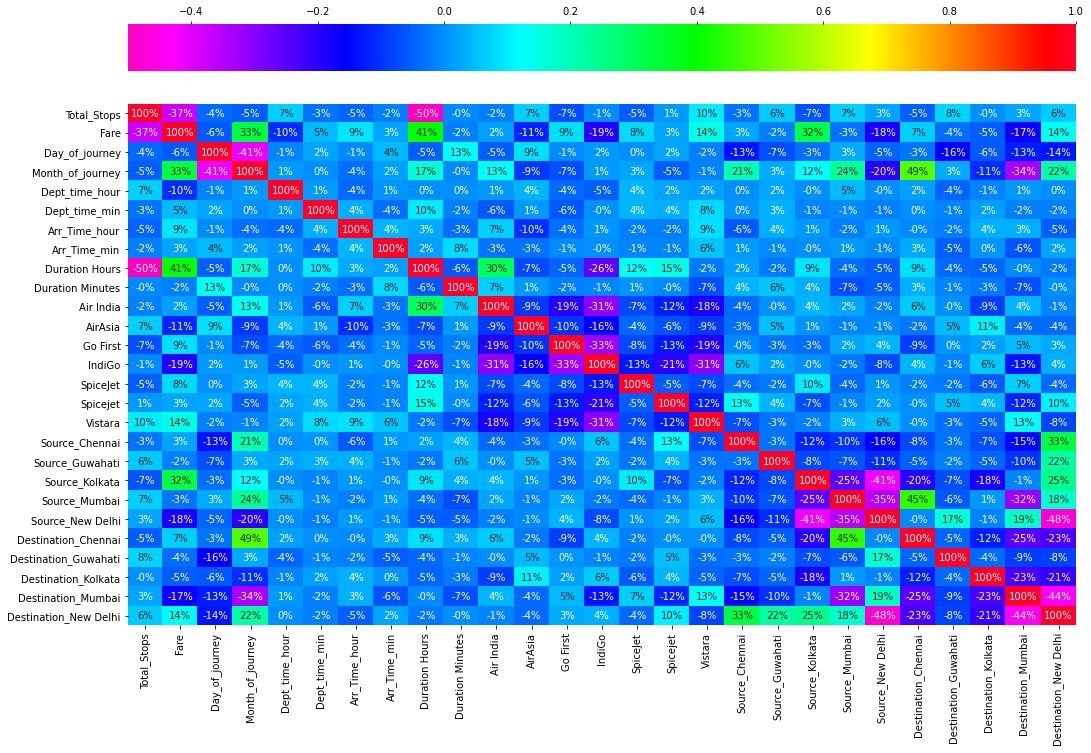

In [107]:
plt.figure(figsize=(17,12))
sns.heatmap(data_new.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

We have created a heatmap to check the corelation between the columns in the data.

1. We can see that fare is corelated with month of journey, duration hours and kolkata source. 
2. Source chennai, guwahati, kolkata, mumbai are corelated with source delhi. 
3. source mumbai and Destonation Chennai and source mumbai and destination new delhi are very highly corelated. 
4. Destination cHennai is having good corelation with month_of_journey. 

<function matplotlib.pyplot.show(close=None, block=None)>

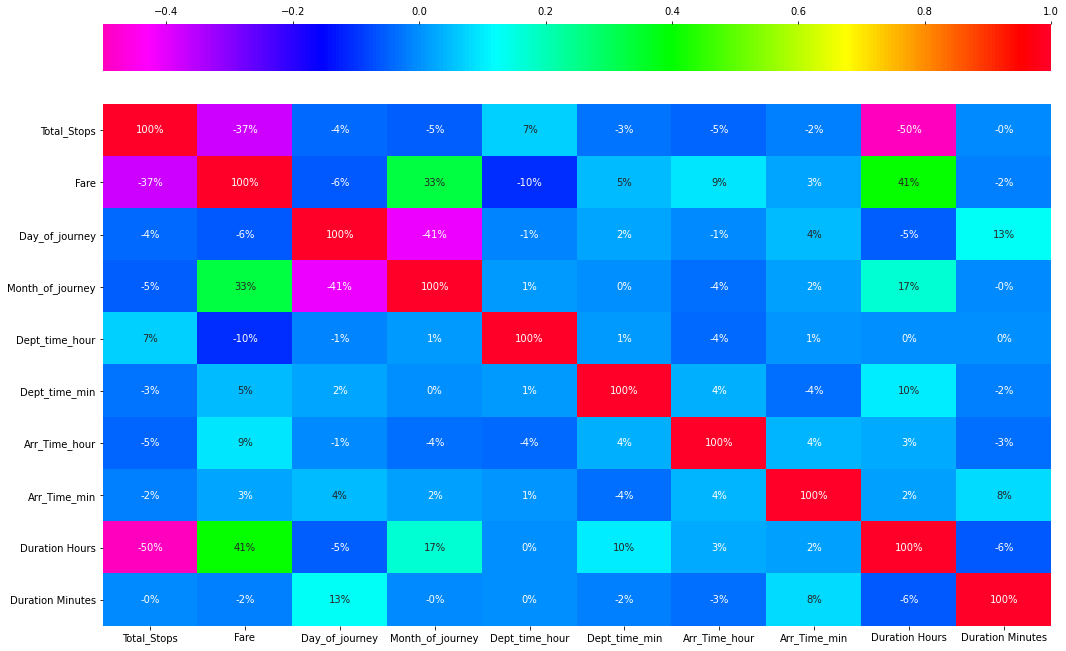

In [109]:
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

In [111]:
calc_vif(data)

,Variables,VIF Factor
0,Total_Stops,1.870965
1,Fare,7.851673
2,Day_of_journey,4.697915
3,Month_of_journey,9.039102
4,Dept_time_hour,5.921307
5,Dept_time_min,3.192852
6,Arr_Time_hour,5.438756
7,Arr_Time_min,3.481138
8,Duration Hours,3.648883
9,Duration Minutes,3.497427


Dataset ready to feed to machine learning algorithms. Above the VIF factor showing the corelation between the columns. 

In [113]:
x = data_new.drop('Fare',axis=1)
x.head()

,Total_Stops,Day_of_journey,Month_of_journey,Dept_time_hour,Dept_time_min,Arr_Time_hour,Arr_Time_min,Duration Hours,Duration Minutes,Air India,...,Source_Chennai,Source_Guwahati,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Chennai,Destination_Guwahati,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,26,2,13,30,20,35,7,5,0,...,0,0,1,0,0,0,0,0,1,0
1,1,26,2,9,5,22,15,13,10,0,...,0,0,1,0,0,0,0,0,1,0
2,0,26,2,16,15,0,35,8,20,0,...,0,0,1,0,0,0,0,0,1,0
3,0,26,2,23,40,6,35,6,55,0,...,0,0,1,0,0,0,0,0,1,0
4,0,26,2,20,0,6,35,10,35,0,...,0,0,1,0,0,0,0,0,1,0


In [114]:
y = data_new['Fare']
y.head()

0    3379.0
1    3379.0
2    3379.0
3    3379.0
4    3379.0
Name: Fare, dtype: float64

We separated the dataset into X and Y. X with independant variables and Y with delendant or target variable

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

We are using standard scaler so that our dataset could be in a same class as of now we can see there are some difference in classes. 

In [117]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [118]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svr = SVR()
rnd = RandomForestRegressor()
knn = KNeighborsRegressor()

In [119]:
def predict_best_state(X):
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
        X.fit(x_train,y_train)
        predict_train = X.predict(x_train)
        predict_test = X.predict(x_test)
        if round(r2_score(y_train,predict_train)*100,1) == round(r2_score(y_test,predict_test)*100,1):
            print("AT random state",i,"the",X,"model is performing good")

In [120]:
predict_best_state(lr)

AT random state 65 the LinearRegression() model is performing good
AT random state 152 the LinearRegression() model is performing good


In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 192)
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
print('Means absolute error for Linear Regression ', mean_absolute_error(y_test,predict_lr))
print('Means Squared Error for Linear Regression',mean_squared_error(y_test,predict_lr))
print('Root mean square for Linear Regression', np.sqrt(mean_squared_error(y_test,predict_lr)))

print('Model Score for Linear Regression ',r2_score(y_test,predict_lr))

Means absolute error for Linear Regression  1102.5431584360565
Means Squared Error for Linear Regression 2495200.1837633406
Root mean square for Linear Regression 1579.620265685187
Model Score for Linear Regression  0.4593227050905483


In [122]:
predict_best_state(dtc)

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 45)
lr.fit(x_train,y_train)
predict_dtc = dtc.predict(x_test)
print('Means absolute error for Decision Tree', mean_absolute_error(y_test,predict_dtc))
print('Means Squared Error for Decision Tree',mean_squared_error(y_test,predict_dtc))
print('Root mean square for  Decision Tree', np.sqrt(mean_squared_error(y_test,predict_dtc)))

print('Model Score for  Decision Tree',r2_score(y_test,predict_dtc))

Means absolute error for Decision Tree 138.10123456790123
Means Squared Error for Decision Tree 411634.19012345676
Root mean square for  Decision Tree 641.5872427998056
Model Score for  Decision Tree 0.9056675996676347


In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15, random_state = 45)
svr.fit(x_train,y_train)
predict_svr = svr.predict(x_test)
print('Means absolute error for SVR', mean_absolute_error(y_test,predict_svr))
print('Means Squared Error for SVR',mean_squared_error(y_test,predict_svr))
print('Root mean square for SVR', np.sqrt(mean_squared_error(y_test,predict_svr)))

print('Model Score for SVR',r2_score(y_test,predict_svr))

Means absolute error for SVR 1482.5434699159568
Means Squared Error for SVR 4665949.349865377
Root mean square for SVR 2160.0808665106447
Model Score for SVR -0.04418946795434198


In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 55)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)
print('Means absolute error for KNeighborsRegressor', mean_absolute_error(y_test,predict_knn))
print('Means Squared Error for KNeighborsRegressor',mean_squared_error(y_test,predict_knn))
print('Root mean square for KNeighborsRegressor', np.sqrt(mean_squared_error(y_test,predict_knn)))

print('Model Score for KNeighborsRegressor',r2_score(y_test,predict_knn))

Means absolute error for KNeighborsRegressor 879.7032098765433
Means Squared Error for KNeighborsRegressor 1761553.1937777777
Root mean square for KNeighborsRegressor 1327.235168980154
Model Score for KNeighborsRegressor 0.6054288232277052


In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40)
rnd.fit(x_train,y_train)
predict_rnd = rnd.predict(x_test)
print('Means absolute error for RandomForestRegressor', mean_absolute_error(y_test,predict_rnd))
print('Means Squared Error for RandomForestRegressor',mean_squared_error(y_test,predict_rnd))
print('Root mean square for RandomForestRegressor', np.sqrt(mean_squared_error(y_test,predict_rnd)))

print('Model Score for RandomForestRegressor',r2_score(y_test,predict_rnd))

Means absolute error for RandomForestRegressor 672.4054567901235
Means Squared Error for RandomForestRegressor 1223759.3333261728
Root mean square for RandomForestRegressor 1106.23656300367
Model Score for RandomForestRegressor 0.7073540700588785


From the above results we can check that decision tree is giving the highest results which is 90%. 

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
score_dtc=cross_val_score(dtc,x,y,cv=5)
print('\n')
print("Cross validation Score for Decision Tree is",score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('\n')
score_lr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score for Linear Regression is",score_lr)
print(score_lr.mean())
print(score_lr.std())
print('\n')
score_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation Score for SVR is",score_svr)
print(score_svr.mean())
print(score_svr.std())
print('\n')
score_rnd=cross_val_score(rnd,x,y,cv=5)
print("Cross validation Score for Random Forest Regressor is",score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('\n')
score_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation Score for K neighnors is",score_knn)
print(score_knn.mean())
print(score_knn.std())
print('\n')



Cross validation Score for Decision Tree is [-0.63181544 -0.75266187 -0.11161588  0.03196275 -0.18247727]
-0.32932154217230153
0.3066610271657538


Cross validation Score for Linear Regression is [ 1.47598070e-01 -2.70229203e+22  3.44691140e-01 -2.54941877e-02
  2.20440580e-01]
-5.40458405504829e+21
1.080916811009658e+22


Cross validation Score for SVR is [-0.17614432  0.00537535 -0.04722639 -0.00076953 -0.30229264]
-0.10421150560138762
0.11863160557871684


Cross validation Score for Random Forest Regressor is [0.1466711  0.21308898 0.2133032  0.42889989 0.20473066]
0.24133876755856573
0.09702096582439557


Cross validation Score for K neighnors is [-0.05992274 -0.04313326  0.14284679  0.06531056 -0.11513522]
-0.002006773410678142
0.09312128791767581




Here we can see that we have a minimum difference between the Decision tree hence proceeding with the same. 

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
criterion = ['squared_error','friedman_mse','absolute_error','poisson']
splitter = ['random','best']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [5,10,15,20,100]
min_samples_leaf = [2,5,10,15]
ccp_alpha = [0.5,1.5,2.5,3.5,4.5,5.5]
max_features = [2,4,6,8,10]
max_features = ['auto','sqrt','log2']

random_grid = {
    'criterion':criterion,
    'max_features':max_features,
    'max_features':max_features,
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

Here we are creating a grid of variables, which are few conditions that will pass into the randomsearch CV and try to enhance the score using ceratin features. 

In [147]:
rf_random = RandomizedSearchCV(estimator=dtc,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

In [148]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=15, splitter=best; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=log2, min_samples_le

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'splitter': ['random', 'best']},
                   scoring='neg_mean_squared_error', verbose=2)

In [149]:
rf_random.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'friedman_mse'}

Best parameter for decision trees. 

In [151]:
import pickle
filename = 'flight_price_prediction.pkl'
pickle.dump(dtc, open(filename, 'wb'))